

### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Proyecto Investigación

Profesora: María Auxiliadora Mora

Estudiantes:
 1. Pablo Alberto Muñoz Hidalgo
 2. Luis Andrés Rojas Murillo

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: En parejas.

---

Objetivo: exponer a la clase el funcionamiento de los transformers para la generacion de imágenes asi com la dinámica que se desarrolla para este ejercion incluyendo algunos de los porcesos que se ven implicados en el ejercicio

Problema: se da una imagen espacífica al transformer el mismo la identifca así como realiza un analisis a nivel de pixeles que posteriormente utilizará para generar una nueva imagen según la logica que él mismo transformer utilizó para hacer su distinción en primera instancia. En nuestro caso vamos a mostrar los resultados obtenidos. 

### Descripción del algoritmo

La generación de imágenes con Transformers ha supuesto un avance significativo, los transformadores son conocidos por su capacidad para capturar relaciones de largo alcance y modelar dependencias globales en los datos, lo que los hace especialmente adecuados para tareas de procesamiento del lenguaje natural. Sin embargo, su aplicación en la generación de imágenes ha resultado prometedora y ha dado lugar a interesantes avances en este campo.

Un ejemplo notable es ImageGPT, desarrollado por OpenAI. ImageGPT es una extensión del modelo GPT-2, entrenado originalmente para tareas de procesamiento del lenguaje natural. Sin embargo, OpenAI adaptó este modelo para predecir el valor del siguiente píxel de una imagen, lo que permite generar imágenes tanto incondicionales como condicionales. A pesar de haber sido entrenado en imágenes de baja resolución sin etiquetas, ImageGPT ha demostrado aprender representaciones de imagen sólidas.

Otro enfoque interesante es el método Taming Transformer, que combina el sesgo inductivo de las redes neuronales convolucionales (CNN) con la expresividad de los Transformers. En este caso, se utiliza una CNN VQGAN para aprender un libro de códigos que representa partes visuales ricas en contexto. Estos códigos se utilizan posteriormente para sintetizar imágenes de alta resolución. Esta combinación de técnicas permite capturar tanto la estructura local de las imágenes (gracias a las CNN) como las relaciones de largo alcance (gracias a los Transformers), mejorando la calidad y coherencia de las imágenes generadas.

En resumen, la generación de imágenes con Transformers ha ampliado el alcance de los modelos basados en esta arquitectura más allá del procesamiento del lenguaje natural. Los enfoques mencionados, como ImageGPT, Taming Transformer, ViTGAN y StyleSwin, han demostrado su eficacia en la generación de imágenes de alta resolución, capturando tanto la estructura local como las relaciones de largo alcance en los datos visuales. Estos avances prometen abrir nuevas posibilidades en la generación automática de contenidos visuales y aplicaciones que van desde la creación artística a la síntesis de imágenes realistas en campos como el diseño gráfico, la realidad virtual y la animación.

# Fundamentros Matemáticos 

Los Transformers se basan en una operación matemática clave utilizada para capturar las relaciones espaciales y contextuales entre diferentes partes de una imagen, los bloques fundamentales o capas que componen un transformer son: las capas de atención y las capas completamente conectadas. Estas capas forman la base matemática de los Transformers y son esenciales para la generación de imágenes. 

En nuestro caso los tensores de PyTorch se utilizan para representar y manipular las imágenes de entrada, así como las características aprendidas por el modelo durante el proceso de entrenamiento. Los tensores permiten realizar cálculos eficientes y realizar operaciones matriciales necesarias para la capa de atención y las capas completamente conectadas.

1. **Las capas de atención** Son la clave para capturar relaciones de larga distancia en una imagen y permiten que los transformadores se enfoquen en partes relevantes de la imagen. En el contexto de la creación de imágenes, las capas de atención se utilizan para combinar información de diferentes áreas de una imagen para crear características más contextuales. Parte de los criterios que utiliza esta capa es el calculo de la importancia relativa de cada píxel en función de su relación con otros píxeles de la imagen.
El cálculo de la atención implica calcular los productos escalares entre un vector que representa un píxel o una región de la imagen para la que se está calculando la atención y el conjunto de vectores que representan los píxeles o regiones de la imagen que se están comparando , seguido de una función de softmax la cual  resalta las diferencias relativas entre los elementos y la salida de softmax se interpreta como una distribución de probabilidad sobre las clases posibles. Para obtener los pesos normalizados que indican la importancia relativa de cada valor. Finalmente, se realiza una combinación lineal ponderada de los valores utilizando los pesos calculados.


2. **Las capas completamanete conectadas** se utilizan para procesar las características extraídas por las capas de atención. Estas capas aplican una transformación lineal a los datos de entrada y les aplican una función de activación no lineal, como ReLU (Rectified Linear Unit). Este proceso coolabora en generar píxeles o regiones de la imagen en función de las características aprendidas por el modelo.



### Ejemplo de transformers aplicado a imágenes

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL

import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T

from timm import create_model

C:\Users\joaqr\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Se utiliza un modelo preentrenado para facilitar el proceso y acortar la presentación

In [3]:
model_name = "vit_base_patch16_224"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
model = create_model(model_name, pretrained=True).to(device)

device =  cpu


C:\Users\joaqr\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\joaqr\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Se definen las variables basicas para el modelo, como: tamaño de la imagen reescalada, normalizacion de colores etc...

In [4]:
IMG_SIZE = (224, 224)
NORMALIZE_MEAN = (0.5, 0.5, 0.5)
NORMALIZE_STD = (0.5, 0.5, 0.5)
transforms = [
              T.Resize(IMG_SIZE),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms = T.Compose(transforms)

Se define la imagen y los labels que va a utilizar la red

In [5]:

imagenet_labels = dict(enumerate(open('ilsvrc2012_wordnet_lemmas.txt')))

img = PIL.Image.open('cat.png')
#img = PIL.Image.open('bird.jpg')
#img = PIL.Image.open('santorini.png')
#EJEMPLOS PARCIALES
#img = PIL.Image.open('butterfly.jpg')
#EJEMPLO COMPLICADO
#img = PIL.Image.open('plane.jpg')
#EJEMPLO DE RESULTADO CERCANO
#img = PIL.Image.open('bed.jpg')

img_tensor = transforms(img).unsqueeze(0).to(device)

Se imprime la imagen que se va a utilizar y los píxeles, hasta ahora nada del otro mundo que hayamos visto en proyectos anteriores

Inference Result:
Egyptian_cat



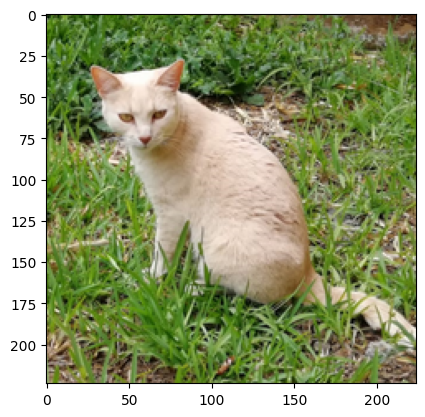

In [6]:
output = model(img_tensor)

print("Inference Result:")
print(imagenet_labels[int(torch.argmax(output))])
plt.imshow(img)

In [7]:
patches = model.patch_embed(img_tensor)  # patch embedding convolution
print("Tensor de la imagen: ", img_tensor.shape)
print("Integracion de los sectores o parches: ", patches.shape)

Tensor de la imagen:  torch.Size([1, 3, 224, 224])
Integracion de los sectores o parches:  torch.Size([1, 196, 768])


Meramente con el proposito representativo de lo que ve la red neuronal cuando divide la imagen aqui se imprime para simular que somos la red.

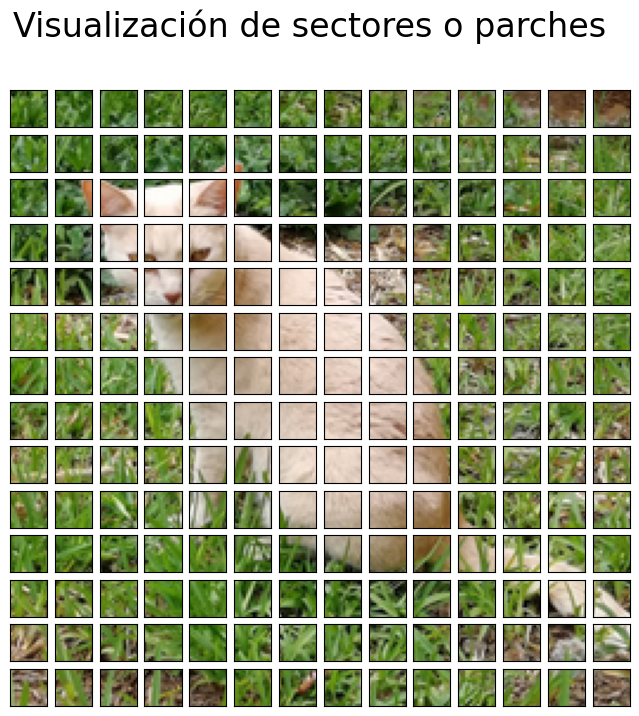

In [8]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualización de sectores o parches", fontsize=24)
img = np.asarray(img)
for i in range(0, 196):
    x = i % 14
    y = i // 14
    patch = img[y*16:(y+1)*16, x*16:(x+1)*16]
    ax = fig.add_subplot(14, 14, i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(patch)

In [9]:
pos_embed = model.pos_embed
print(pos_embed.shape)

torch.Size([1, 197, 768])


Aqui se visualizan las similaridades entre las posiciones de integración, esto muestra donde hay similitudes con los otros sectores de la imagen, esto lo hace la red para de esta manera predecir como se veria una imagen similar y poder generar algo lo más parecido posible

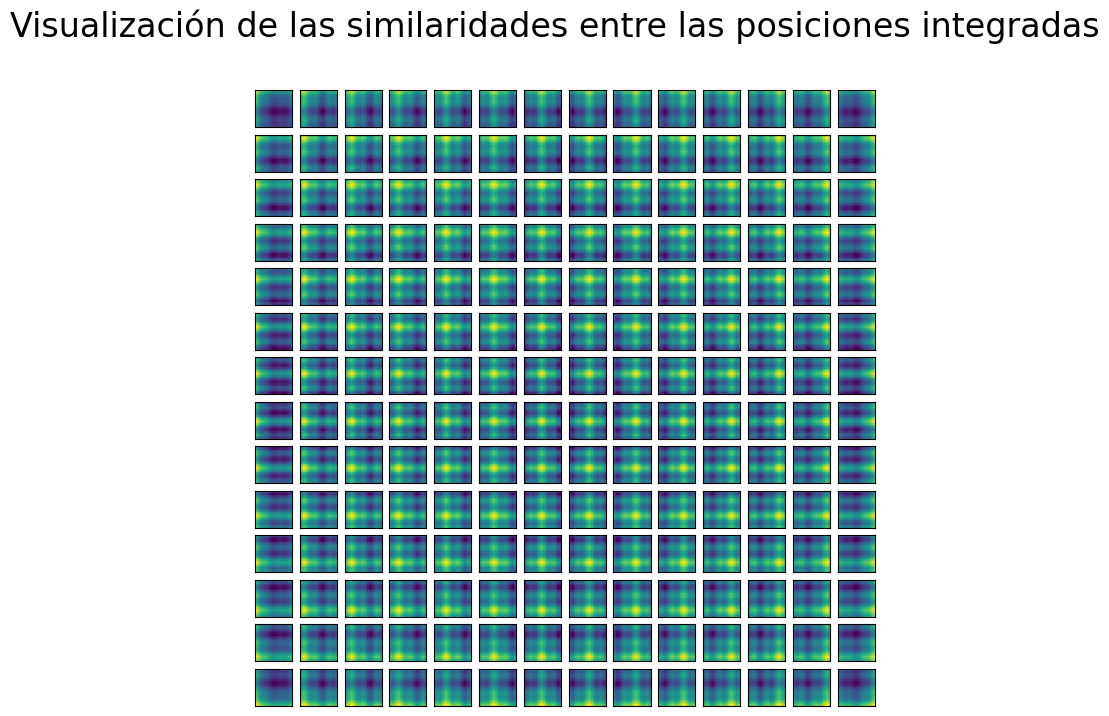

In [10]:
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualización de las similaridades entre las posiciones integradas", fontsize=24)
for i in range(1, pos_embed.shape[1]):
    sim = F.cosine_similarity(pos_embed[0, i:i+1], pos_embed[0, 1:], dim=1)
    sim = sim.reshape((14, 14)).detach().cpu().numpy()
    ax = fig.add_subplot(14, 14, i)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(sim)

In [11]:
transformer_input = torch.cat((model.cls_token, patches), dim=1) + pos_embed
print("Tamaño del input para el transformer: ", transformer_input.shape)

Tamaño del input para el transformer:  torch.Size([1, 197, 768])


In [12]:
print("Tamaño del input para el transformer vector z0: ", transformer_input.shape)
x = transformer_input.clone()
for i, blk in enumerate(model.blocks):
    print("Codificador de transformer numero: {}".format(i))
    x = blk(x)
x = model.norm(x)
transformer_output = x[:, 0]
print("Salida del transformer, vector z12-0:", transformer_output.shape)

Tamaño del input para el transformer vector z0:  torch.Size([1, 197, 768])
Codificador de transformer numero: 0
Codificador de transformer numero: 1
Codificador de transformer numero: 2
Codificador de transformer numero: 3
Codificador de transformer numero: 4
Codificador de transformer numero: 5
Codificador de transformer numero: 6
Codificador de transformer numero: 7
Codificador de transformer numero: 8
Codificador de transformer numero: 9
Codificador de transformer numero: 10
Codificador de transformer numero: 11
Salida del transformer, vector z12-0: torch.Size([1, 768])


## ¿Como el transformer le pone atención a la imagen de demo?

In [13]:
print("Bloque de atención del transformer:")
attention = model.blocks[0].attn
print(attention)

Bloque de atención del transformer:
Attention(
  (qkv): Linear(in_features=768, out_features=2304, bias=True)
  (q_norm): Identity()
  (k_norm): Identity()
  (attn_drop): Dropout(p=0.0, inplace=False)
  (proj): Linear(in_features=768, out_features=768, bias=True)
  (proj_drop): Dropout(p=0.0, inplace=False)
)


In [14]:
transformer_input_expanded = attention.qkv(transformer_input)[0]
print("Se expande la dimension del input a: ", transformer_input_expanded.shape)

Se expande la dimension del input a:  torch.Size([197, 2304])


Aquí se puede observar donde es que el algoritmo centra su atención para poder replicar o imitar una imagen similar, hay que tener en cuenta que para la red estas imagenes tienen todo el sentido del mundo ya que como sabemos pasa por diferentes capas las cuales cada una analiza algo diferente y toma los datos más importantes de la imagen.

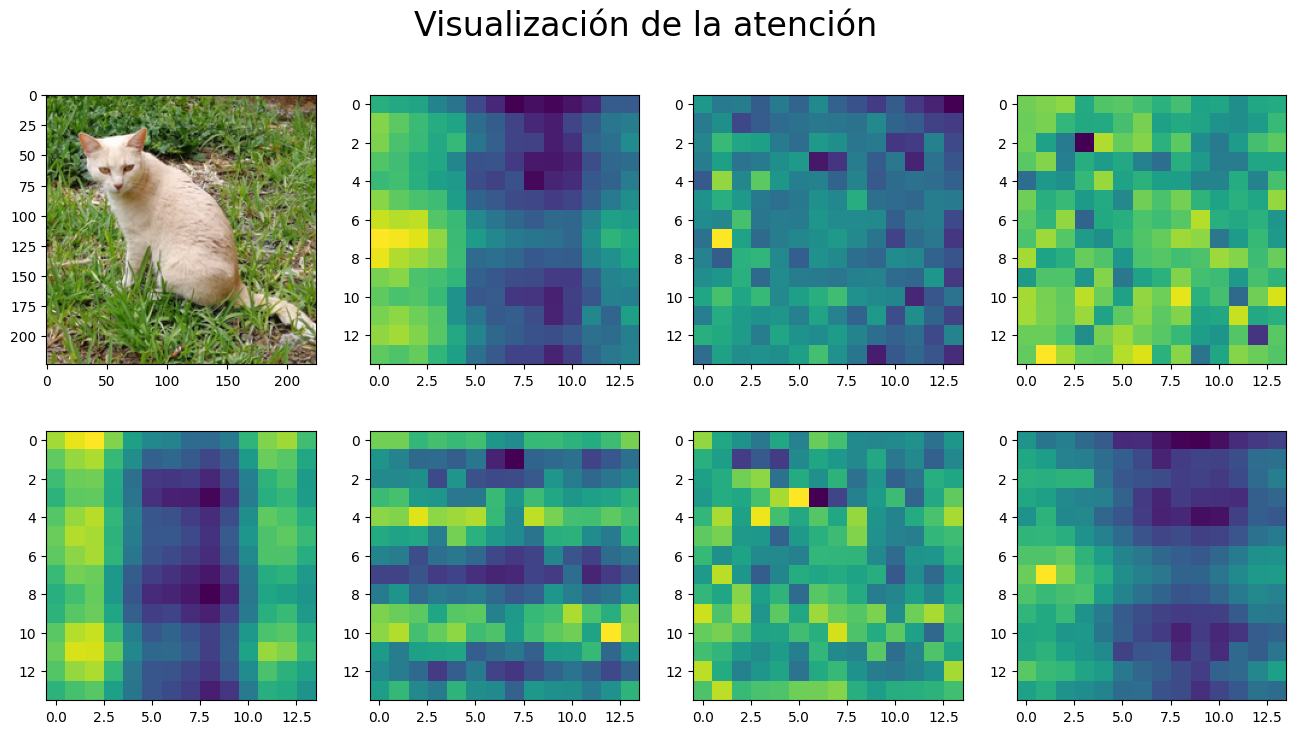

In [15]:
qkv = transformer_input_expanded.reshape(197, 3, 12, 64)  
q = qkv[:, 0].permute(1, 0, 2) 
k = qkv[:, 1].permute(1, 0, 2) 
kT = k.permute(0, 2, 1)  
# Matriz de atención
attention_matrix = q @ kT
# Visualize attention matrix
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Visualización de la atención", fontsize=24)
img = np.asarray(img)
ax = fig.add_subplot(2, 4, 1)
ax.imshow(img)
for i in range(7):  # visualize the 100th rows of attention matrices in the 0-7th heads
    attn_heatmap = attention_matrix[i, 100, 1:].reshape((14, 14)).detach().cpu().numpy()
    ax = fig.add_subplot(2, 4, i+2)
    ax.imshow(attn_heatmap)

# 4. Todo tiene sentido, clasificación:

Resultado de la inferencia : id = 285, label name = Egyptian_cat



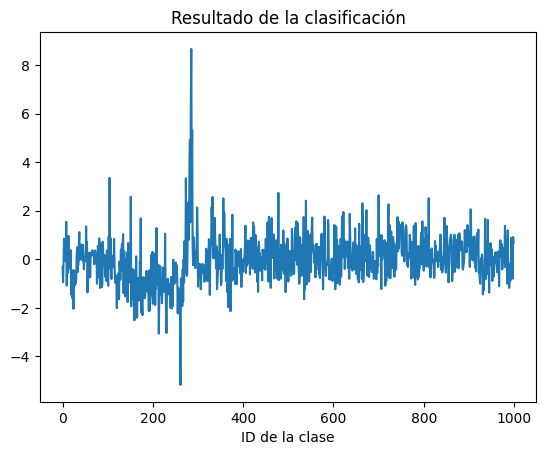

In [16]:
result = model.head(transformer_output)
result_label_id = int(torch.argmax(result))
plt.plot(result.detach().cpu().numpy()[0])
plt.title("Resultado de la clasificación")
plt.xlabel("ID de la clase")
print("Resultado de la inferencia : id = {}, label name = {}".format(
    result_label_id, imagenet_labels[result_label_id]))

Por supuesto el pico más grande o alto es por el que se va a inclinar la red

### Referencias:

Hugging Face. (n.d.). ImageGPT. Retrieved May 15, 2023, from https://huggingface.co/docs/transformers/model_doc/imagegpt

Analytics India Magazine. (n.d.). Generating High Resolution Images Using Transformers. Retrieved May 15, 2023, from https://analyticsindiamag.com/generating-high-resolution-images-using-transformers/

arXiv.org. (n.d.). [2107.04589] ViTGAN: Training GANs with Vision Transformers. Retrieved May 15, 2023, from https://arxiv.org/abs/2107.04589

arXiv.org. (n.d.). StyleSwin: Transformer-based GAN for High-resolution Image Generation. Retrieved May 19, 2023, from https://arxiv.org/abs/2112.10762

Hugging Face. (n.d.). 🤗 Transformers. Retrieved May 19, 2023, from https://huggingface.co/docs/transformers

Honda, H. (n.d.). Vision Transformer Tutorial. Colaboratory. Retrieved May 22, 2023, from https://colab.research.google.com/github/hirotomusiker/schwert_colab_data_storage/blob/master/notebook/Vision_Transformer_Tutorial.ipynb#scrollTo=SVxGzgZE9oeY